# Importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importamos los datos, los cuales transpusimos anteriormente para que sea más fácil trabajar con ellos.

In [2]:
df = pd.read_csv('problema3transpuesto.csv')

In [3]:
df

,x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0
5,38,280,74,674,0
6,40,235,175,275,1
7,25,200,180,180,1
8,35,150,240,140,1
9,34,280,130,80,1


# Visualizamos los datos para ver con que columnas nos conviene realizar el ajuste de datos.

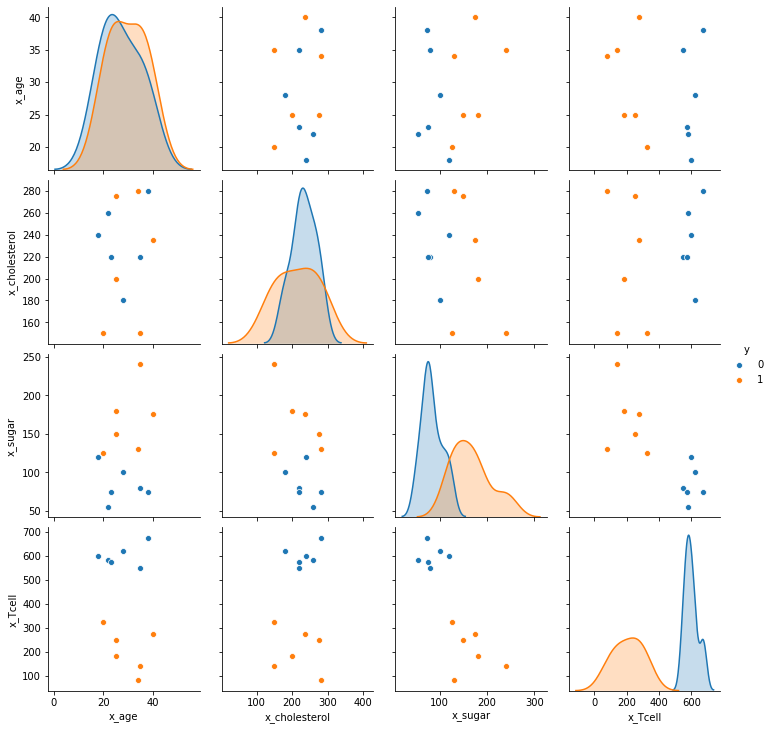

In [4]:
sns.pairplot(df, hue='y', markers='o')
plt.show()

# Observemos que las variables que tienen un mejor desempeño son las columnas correpondientes a las células T y nivel de azucar.

# Procedemos a dividir los datos.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[['x_sugar','x_Tcell']], df.y, test_size=0.25, random_state=5)

# Relizamos el ajuste de datos con el modelo QuadraticDiscriminantAnalysis y visualizamos el resultado.

In [6]:
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [7]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
h = 1
# calculate min, max and limits
x_min, x_max = df['x_sugar'].min() - 50, df['x_sugar'].max() + 50
y_min, y_max = df['x_Tcell'].min() - 50, df['x_Tcell'].max() + 50
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

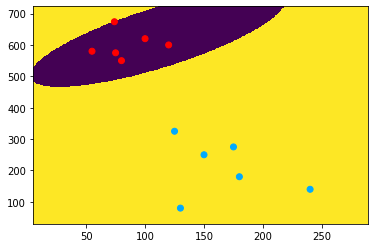

In [8]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)
plt.scatter(df['x_sugar'], df['x_Tcell'], c=df.y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [9]:
predictions=model.predict(x_test)
print(accuracy_score(y_test,predictions))

1.0


# Relizamos el ajuste de datos con el modelo LinearDiscriminantAnalysis y visualizamos el resultado.

In [10]:
model2 = LinearDiscriminantAnalysis()
model2.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

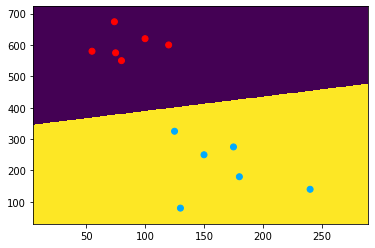

In [11]:
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)
plt.scatter(df['x_sugar'], df['x_Tcell'], c=df.y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [12]:
predictions2=model2.predict(x_test)
print(accuracy_score(y_test,predictions2))

1.0


# Observemos que aunque ambos modelos tienen el mismo desempeño cuantitativamente, cualitativamente el modelo lineal tiene un mejor desempeño.